
"""

Filters the raw base for creating a cleaner "Dataset_base"


"""


# Import the code 


In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Dataprep'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Code', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:
DEBUG = True

In [6]:
pd.set_option('display.max_rows', 50);

In [7]:
pd.set_option('display.max_columns', 50);

In [8]:
pd.set_option('display.width', 200);

In [9]:

doglevel = ['@id_DOG']


In [10]:

#df.ft_raw = pd.read_csv(f'{fileloc}/raw_base_2022-12-03.csv', parse_dates = True)
df.ft_raw = pd.read_csv(f'{fileloc}/raw_base_2023-06-07.csv', parse_dates = True)

print(df.ft_raw.shape)
print(df.ft_raw.columns.values.tolist())

# 588017 records


(725080, 45)
['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs', 'position', 'y_pos', 'y_margin']


In [11]:

print(df.ft_raw.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs', 'position', 'y_pos', 'y_margin']


In [12]:

# Find the Places to be removed
print( pd.DataFrame(df.ft_raw['Place'].value_counts()).transpose() )


            1      2      5      3      4      6      7      8   3=   4=   2=   5=   1=   6=   7=
Place  100232  99968  99909  99860  99840  93484  75810  52964  591  568  524  455  380  339  156


In [13]:

print( pd.DataFrame(df.ft_raw['position'].value_counts()).transpose() )


               1       2       3       4       5      6      7      8
position  100612  100492  100451  100408  100364  93823  75966  52964


In [14]:

df_base_fo_grading = df.ft_raw.copy()


In [15]:

df_base_fo_grading.sort_values(by = ['@id_DOG', 'DogName', 'Event_Dt'], inplace = True)


In [16]:

#df_base0[df_base0.DogName.isin(['FOURTH DIMENTION'])].head()
df_base_fo_grading[df_base_fo_grading['@id_RACE'].isin([631783547]) ]


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap_DOG,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,TrainerName,RaceBox,Rating,DogGrade,DogGOBIS,DogPRIZE,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,RaceTimeDateUTC,GOBIS,Hurdle,Handicap_RACE,TAB,GradeCode,racetime_fix,ft_sp,x_num_dogs,position,y_pos,y_margin
70,114244064,2,FOURTH DIMENTION,3.0,3,33.4,$4.20,NaN,0.39,0.39,M/22,1,NaN,8.36,22.75,NaN,631783547,131578,P Pollutro,3.0,97.0,5,N,21880.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,4.2,8,2,2,0.39
2040,157829531,3,TUI,4.0,4,29.3,$8.50,NaN,3.60,3.21,M/43,4,NaN,8.47,22.97,NaN,631783547,110965,C Haigh,4.0,98.0,5,N,10128.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,8.5,8,3,3,3.60
2319,164415675,6,BIG PLANS,2.0,2,39.7,$9.10,NaN,8.80,1.21,M/68,0,NaN,8.62,23.34,NaN,631783547,255489,K Thorburn,2.0,91.0,5,N,4930.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,9.1,8,6,6,8.80
3170,184236240,5,CEE JAY ACE,1.0,1,33.0,$2.80F,NaN,7.59,2.23,S/86,1,NaN,8.73,23.25,NaN,631783547,283109,L Dalziel,1.0,100.0,5,N,24820.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,2.8,8,5,5,7.59
3443,190918076,4,BANJO PLATO,8.0,8,33.1,$14.10,NaN,5.36,1.76,S/75,0,NaN,8.64,23.10,NaN,631783547,65076,D Belsham,8.0,95.0,5,N,5435.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,14.1,8,4,4,5.36
8508,224008138,7,HEIDI INTENTION,7.0,7,25.7,$6.20,NaN,14.94,6.14,M/57,11,NaN,8.48,23.77,NaN,631783547,27599,J Caley,7.0,100.0,5,N,8970.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,6.2,8,7,7,14.94
47872,314053857,1,PARUMBA BARCIA,6.0,6,30.2,$14.50,NaN,0.39,NaN,M/11,1,NaN,8.29,22.72,NaN,631783547,132501,E Lieshout,6.0,97.0,5,N,3645.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,14.5,8,1,1,0.39
88992,340020191,8,HURRICANE PETE,5.0,5,32.7,$18.10,NaN,16.19,1.24,M/34,15,NaN,8.43,23.85,NaN,631783547,69852,J Sultana,5.0,91.0,5,N,3685.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,18.1,8,8,8,16.19


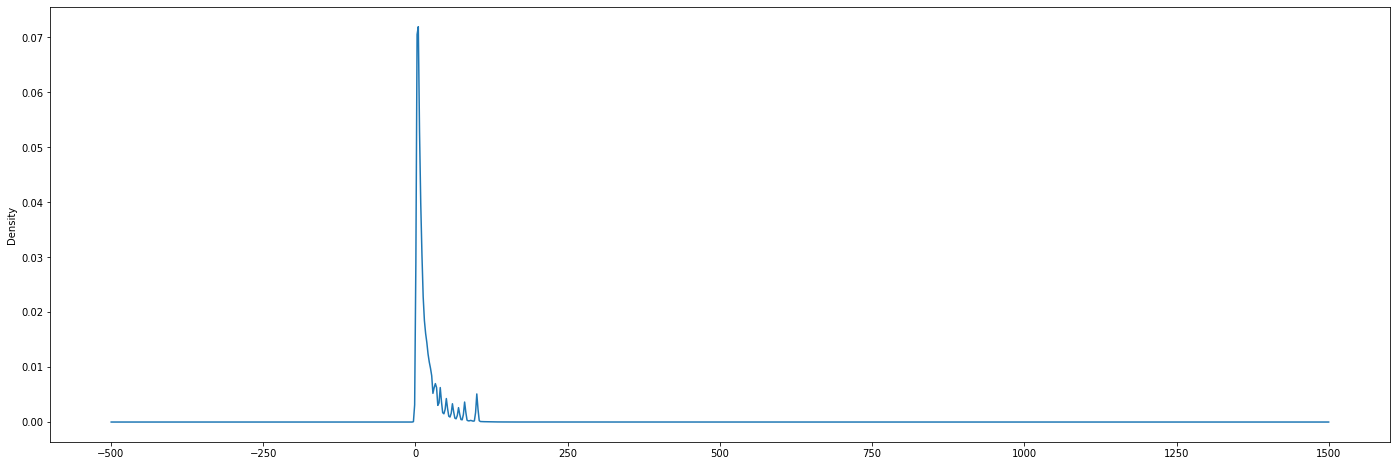

In [17]:

df_base_fo_grading['ft_sp'].plot(kind = 'density', figsize = (24,8))


In [18]:

print(df_base_fo_grading.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs', 'position', 'y_pos', 'y_margin']


In [19]:

display(df_base_fo_grading.DogGrade.value_counts())


5    314447
M    117083
7    105395
6     80466
4     63236
3     23566
1     11069
2      9818
Name: DogGrade, dtype: int64

In [20]:

df_base_fo_grading.dtypes


@id_DOG              int64
Place               object
DogName             object
Box                float64
Rug                  int64
Weight             float64
StartPrice          object
Handicap_DOG       float64
Margin1            float64
Margin2            float64
PIR                 object
Checks               int64
Comments            object
SplitMargin        float64
y_runtime          float64
Prizemoney         float64
RaceId               int64
TrainerId            int64
TrainerName         object
RaceBox            float64
Rating             float64
DogGrade            object
DogGOBIS            object
DogPRIZE           float64
@id_RACE             int64
RaceNum              int64
RaceName            object
RaceTime            object
Distance            object
RaceGrade           object
Track               object
date                object
Event_Dt            object
RaceTimeDateUTC     object
GOBIS              float64
Hurdle             float64
Handicap_RACE      float64
T

In [23]:

print(df_base_fo_grading['DogGrade'].value_counts())


5    314447
M    117083
7    105395
6     80466
4     63236
3     23566
1     11069
2      9818
Name: DogGrade, dtype: int64


In [26]:

# DogGrade

#df_base_fo_grading['dg'] = df_base_fo_grading['DogGrade'].apply(lambda x : 8 if x == 'M' else int(x*1))
#df_base_fo_grading['dg'] = np.where(df_base_fo_grading['DogGrade'] == 'M', 8, df_base_fo_grading['DogGrade'].astype(int))
df_base_fo_grading['dg'] = df_base_fo_grading['DogGrade'].replace('M', '8').astype(int)

print(df_base_fo_grading['dg'].value_counts())
print(df_base_fo_grading['dg'].dtypes)


5    314447
8    117083
7    105395
6     80466
4     63236
3     23566
1     11069
2      9818
Name: dg, dtype: int64
int64


In [28]:

df_base_fo_grading['dg_prev'] = df_base_fo_grading.groupby(doglevel)['dg'].shift(1)
df_base_fo_grading['dg_prev'].fillna(-1, inplace = True)

print(df_base_fo_grading['dg_prev'].dtypes)
print(df_base_fo_grading['dg_prev'].value_counts(dropna = False))


float64
 5.0    301647
 8.0    111000
 7.0    101168
 6.0     77413
 4.0     60693
-1.0     30513
 3.0     22639
 1.0     10599
 2.0      9408
Name: dg_prev, dtype: int64


In [29]:

#df_base_fo_grading['firstrace'] = df_base_fo_grading.apply(lambda x : 1 if x.dg_prev == -1 else 0, axis = 1)
df_base_fo_grading['firstrace'] = df_base_fo_grading['dg_prev'].eq(-1).astype(int)


In [30]:

display(df_base_fo_grading['firstrace'].value_counts())


0    694567
1     30513
Name: firstrace, dtype: int64

In [31]:

df_base_fo_grading['upgrade'] = df_base_fo_grading.apply(lambda x : 1 if x.dg < x.dg_prev else 0, axis = 1)

df_base_fo_grading['downgrade'] = df_base_fo_grading.apply(lambda x : 1 if x.dg > x.dg_prev else 0, axis = 1)


In [32]:

upg = df_base_fo_grading.groupby(['dg_prev','dg','upgrade']).agg( {'@id_DOG':'count'} ).unstack(level = 2)

display(upg)


@id_DOG         
upgrade           0        1
dg_prev dg                  
-1.0    1     165.0      NaN
        2     137.0      NaN
        3     317.0      NaN
        4     804.0      NaN
        5    4123.0      NaN
...             ...      ...
 8.0    4       NaN    520.0
        5       NaN   1933.0
        6       NaN    418.0
        7       NaN  15551.0
        8   92080.0      NaN

[61 rows x 2 columns]

In [33]:

downg = df_base_fo_grading.groupby(['dg_prev','dg','downgrade']).agg( {'@id_DOG':'count'} ).unstack(level = 2)

display(downg)


@id_DOG        
downgrade         0       1
dg_prev dg                 
-1.0    1       NaN   165.0
        2       NaN   137.0
        3       NaN   317.0
        4       NaN   804.0
        5       NaN  4123.0
...             ...     ...
 8.0    4     520.0     NaN
        5    1933.0     NaN
        6     418.0     NaN
        7   15551.0     NaN
        8   92080.0     NaN

[61 rows x 2 columns]

In [34]:

"""
df_base_fo_grading['upg_87'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 7) & (x.dg_prev == 8) else 0, axis = 1)
df_base_fo_grading['upg_76'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 6) & (x.dg_prev == 7) else 0, axis = 1)
df_base_fo_grading['upg_65'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 5) & (x.dg_prev == 6) else 0, axis = 1)
df_base_fo_grading['upg_54'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 4) & (x.dg_prev == 5) else 0, axis = 1)
df_base_fo_grading['upg_43'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 3) & (x.dg_prev == 4) else 0, axis = 1)
df_base_fo_grading['upg_32'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 2) & (x.dg_prev == 3) else 0, axis = 1)
df_base_fo_grading['upg_21'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 1) & (x.dg_prev == 2) else 0, axis = 1)
"""

dg = df_base_fo_grading['dg']
dg_prev = df_base_fo_grading['dg_prev']

df_base_fo_grading['upg_87'] = ((dg == 7) & (dg_prev == 8)).astype(int)
df_base_fo_grading['upg_76'] = ((dg == 6) & (dg_prev == 7)).astype(int)
df_base_fo_grading['upg_65'] = ((dg == 5) & (dg_prev == 6)).astype(int)
df_base_fo_grading['upg_54'] = ((dg == 4) & (dg_prev == 5)).astype(int)
df_base_fo_grading['upg_43'] = ((dg == 3) & (dg_prev == 4)).astype(int)
df_base_fo_grading['upg_32'] = ((dg == 2) & (dg_prev == 3)).astype(int)
df_base_fo_grading['upg_21'] = ((dg == 1) & (dg_prev == 2)).astype(int)



In [35]:

print(df_base_fo_grading['upg_87'].value_counts())
print()
print(df_base_fo_grading['upg_76'].value_counts())
print()
print(df_base_fo_grading['upg_65'].value_counts())
print()
print(df_base_fo_grading['upg_54'].value_counts())
print()
print(df_base_fo_grading['upg_43'].value_counts())
print()
print(df_base_fo_grading['upg_32'].value_counts())
print()
print(df_base_fo_grading['upg_21'].value_counts())


0    709529
1     15551
Name: upg_87, dtype: int64

0    712390
1     12690
Name: upg_76, dtype: int64

0    714163
1     10917
Name: upg_65, dtype: int64

0    698621
1     26459
Name: upg_54, dtype: int64

0    719023
1      6057
Name: upg_43, dtype: int64

0    722840
1      2240
Name: upg_32, dtype: int64

0    723690
1      1390
Name: upg_21, dtype: int64


In [36]:

"""
df_base_fo_grading['dng_12'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 1) & (x.dg == 2) else 0, axis = 1)
df_base_fo_grading['dng_23'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 2) & (x.dg == 3) else 0, axis = 1)
df_base_fo_grading['dng_34'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 3) & (x.dg == 4) else 0, axis = 1)
df_base_fo_grading['dng_45'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 4) & (x.dg == 5) else 0, axis = 1)
df_base_fo_grading['dng_56'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 5) & (x.dg == 6) else 0, axis = 1)
df_base_fo_grading['dng_67'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 6) & (x.dg == 7) else 0, axis = 1)
df_base_fo_grading['dng_78'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 7) & (x.dg == 8) else 0, axis = 1)
"""

dg = df_base_fo_grading['dg']
dg_prev = df_base_fo_grading['dg_prev']

df_base_fo_grading['dng_12'] = ((dg_prev == 1) & (dg == 2)).astype(int)
df_base_fo_grading['dng_23'] = ((dg_prev == 2) & (dg == 3)).astype(int)
df_base_fo_grading['dng_34'] = ((dg_prev == 3) & (dg == 4)).astype(int)
df_base_fo_grading['dng_45'] = ((dg_prev == 4) & (dg == 5)).astype(int)
df_base_fo_grading['dng_56'] = ((dg_prev == 5) & (dg == 6)).astype(int)
df_base_fo_grading['dng_67'] = ((dg_prev == 6) & (dg == 7)).astype(int)
df_base_fo_grading['dng_78'] = ((dg_prev == 7) & (dg == 8)).astype(int)


In [37]:

print(df_base_fo_grading['dng_12'].value_counts())
print()
print(df_base_fo_grading['dng_23'].value_counts())
print()
print(df_base_fo_grading['dng_34'].value_counts())
print()
print(df_base_fo_grading['dng_45'].value_counts())
print()
print(df_base_fo_grading['dng_56'].value_counts())
print()
print(df_base_fo_grading['dng_67'].value_counts())
print()
print(df_base_fo_grading['dng_78'].value_counts())



0    724006
1      1074
Name: dng_12, dtype: int64

0    723551
1      1529
Name: dng_23, dtype: int64

0    720159
1      4921
Name: dng_34, dtype: int64

0    701352
1     23728
Name: dng_45, dtype: int64

0    725048
1        32
Name: dng_56, dtype: int64

0    725056
1        24
Name: dng_67, dtype: int64

0    724885
1       195
Name: dng_78, dtype: int64


#### Understanding the Dataset before export 

In [38]:

df_base_fo_grading.describe()


,@id_DOG,Box,Rug,Weight,Handicap_DOG,Margin1,Margin2,Checks,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,RaceBox,Rating,DogPRIZE,@id_RACE,RaceNum,GOBIS,Hurdle,Handicap_RACE,ft_sp,x_num_dogs,position,y_pos,y_margin,dg,dg_prev,firstrace,upgrade,downgrade,upg_87,upg_76,upg_65,upg_54,upg_43,upg_32,upg_21,dng_12,dng_23,dng_34,dng_45,dng_56,dng_67,dng_78
count,7.250800e+05,725080.000000,725080.000000,725079.000000,0.0,725080.000000,624468.000000,725080.000000,605308.000000,725080.000000,498861.000000,7.250800e+05,725080.000000,723219.000000,725080.000000,7.232190e+05,7.250800e+05,725080.000000,0.0,0.0,0.0,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000
mean,4.866356e+08,4.477743,4.584582,29.935174,NaN,6.483733,2.071076,0.426676,7.265410,24.363969,441.621810,7.640069e+08,111702.449377,4.584563,81.573920,1.417759e+04,7.640069e+08,6.173288,NaN,NaN,NaN,17.092809,7.347380,4.171696,4.171696,6.396170,5.632216,5.349037,0.042082,0.122159,0.102302,0.021447,0.017502,0.015056,0.036491,0.008354,0.003089,0.001917,0.001481,0.002109,0.006787,0.032725,0.000044,0.000033,0.000269
std,1.219313e+08,2.343451,2.431397,3.312836,NaN,8.260129,7.241565,1.439907,2.526565,4.941794,2912.322446,7.786416e+07,78747.029834,2.431409,28.612784,2.686894e+04,7.786416e+07,3.287968,NaN,NaN,NaN,21.284010,0.890034,2.163317,2.163317,4.794569,1.526214,1.998761,0.200777,0.327470,0.303045,0.144870,0.131131,0.121777,0.187509,0.091015,0.055496,0.043742,0.038458,0.045873,0.082102,0.177915,0.006643,0.005753,0.016397
min,1.083910e+08,1.000000,1.000000,18.700000,NaN,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.238619e+08,6418.000000,1.000000,0.000000,0.000000e+00,6.238619e+08,1.000000,NaN,NaN,NaN,0.260000,5.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.159944e+08,2.000000,2.000000,27.200000,NaN,2.530000,0.570000,0.000000,5.500000,20.520000,0.000000,6.985139e+08,65438.000000,2.000000,84.000000,2.700000e+03,6.985139e+08,3.000000,NaN,NaN,NaN,4.200000,7.000000,2.000000,2.000000,2.530000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.791464e+08,4.000000,4.000000,29.900000,NaN,5.500000,1.410000,0.000000,6.780000,23.490000,65.000000,7.654781e+08,99808.000000,4.000000,91.000000,7.815000e+03,7.654781e+08,6.000000,NaN,NaN,NaN,8.700000,8.000000,4.000000,4.000000,5.500000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.620734e+08,7.000000,7.000000,32.500000,NaN,9.140000,2.700000,0.000000,8.750000,26.990000,425.000000,8.292900e+08,125087.000000,7.000000,96.000000,1.700700e+04,8.292900e+08,9.000000,NaN,NaN,NaN,21.000000,8.000000,6.000000,6.000000,9.140000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.145360e+09,8.000000,10.000000,55.000000,NaN,5229.500000,5100.140000,25.000000,30.660000,396.120000,1000000.000000,8.978632e+08,337600.000000,10.000000,100.000000,2.364495e+06,8.978632e+08,20.000000,NaN,NaN,NaN,999.990000,8.000000,8.000000,8.000000,27.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:

print(pd.DataFrame(df_base_fo_grading.isna().sum()).transpose())


   @id_DOG  Place  DogName  Box  Rug  Weight  StartPrice  Handicap_DOG  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  y_runtime  Prizemoney  RaceId  TrainerId  TrainerName  RaceBox  \
0        0      0        0    0    0       1           0        725080        0   100612  97952       0    351207       119772          0      226219       0          0            0     1861   

   Rating  DogGrade  DogGOBIS  DogPRIZE  @id_RACE  ...  racetime_fix  ft_sp  x_num_dogs  position  y_pos  y_margin  dg  dg_prev  firstrace  upgrade  downgrade  upg_87  upg_76  upg_65  upg_54  \
0       0         0      1861      1861         0  ...          1821      0           0         0      0         0   0        0          0        0          0       0       0       0       0   

   upg_43  upg_32  upg_21  dng_12  dng_23  dng_34  dng_45  dng_56  dng_67  dng_78  
0       0       0       0       0       0       0       0       0       0       0  

[1 rows x 64 columns]


In [40]:

df_base_fo_grading.agg({'TrainerName':'nunique', 'Track':'nunique', 'DogName':'nunique'})


TrainerName     3703
Track             58
DogName        30537
dtype: int64

In [41]:

print(df_base_fo_grading.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs', 'position', 'y_pos', 'y_margin', 'dg', 'dg_prev', 'firstrace', 'upgrade', 'downgrade', 'upg_87', 'upg_76', 'upg_65', 'upg_54', 'upg_43', 'upg_32', 'upg_21', 'dng_12', 'dng_23', 'dng_34', 'dng_45', 'dng_56', 'dng_67', 'dng_78']


In [42]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random', 'RaceGrade', 'Track']

"""
cols_for_drop = [ 'Place', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin' \
                 , 'Prizemoney', 'TrainerId', 'TrainerName', 'RaceNum', 'RaceName', 'RaceTime', 'date' ]
"""

cols_to_keep = ['@id_DOG', 'DogName', 'RaceId', '@id_RACE','firstrace','upgrade','downgrade'\
               , 'upg_87','upg_76','upg_65','upg_54','upg_43','upg_32','upg_21' \
               , 'dng_12','dng_23','dng_34','dng_45','dng_56','dng_67','dng_78']

todaydt = datetime.now().date()
exp_fname = f'dataset_base_doggrading_{todaydt}.csv'

exp_ds = df_base_fo_grading[cols_to_keep]



In [43]:

print(exp_ds.shape)


(725080, 21)


In [44]:

print(exp_ds.columns.values.tolist())


['@id_DOG', 'DogName', 'RaceId', '@id_RACE', 'firstrace', 'upgrade', 'downgrade', 'upg_87', 'upg_76', 'upg_65', 'upg_54', 'upg_43', 'upg_32', 'upg_21', 'dng_12', 'dng_23', 'dng_34', 'dng_45', 'dng_56', 'dng_67', 'dng_78']


In [45]:

exp_ds.head()


,@id_DOG,DogName,RaceId,@id_RACE,firstrace,upgrade,downgrade,upg_87,upg_76,upg_65,upg_54,upg_43,upg_32,upg_21,dng_12,dng_23,dng_34,dng_45,dng_56,dng_67,dng_78
0,108390981,DOLLY DOES IT,626271182,626271182,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,108390981,DOLLY DOES IT,629797242,629797242,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,108390981,DOLLY DOES IT,629797513,629797513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,108390981,DOLLY DOES IT,638810808,638810808,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,108390981,DOLLY DOES IT,643554706,643554706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:

exp_ds.describe()


,@id_DOG,RaceId,@id_RACE,firstrace,upgrade,downgrade,upg_87,upg_76,upg_65,upg_54,upg_43,upg_32,upg_21,dng_12,dng_23,dng_34,dng_45,dng_56,dng_67,dng_78
count,7.250800e+05,7.250800e+05,7.250800e+05,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000
mean,4.866356e+08,7.640069e+08,7.640069e+08,0.042082,0.122159,0.102302,0.021447,0.017502,0.015056,0.036491,0.008354,0.003089,0.001917,0.001481,0.002109,0.006787,0.032725,0.000044,0.000033,0.000269
std,1.219313e+08,7.786416e+07,7.786416e+07,0.200777,0.327470,0.303045,0.144870,0.131131,0.121777,0.187509,0.091015,0.055496,0.043742,0.038458,0.045873,0.082102,0.177915,0.006643,0.005753,0.016397
min,1.083910e+08,6.238619e+08,6.238619e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.159944e+08,6.985139e+08,6.985139e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.791464e+08,7.654781e+08,7.654781e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.620734e+08,8.292900e+08,8.292900e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.145360e+09,8.978632e+08,8.978632e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
print(datetime.now())

2023-06-07 14:02:08.323633


In [48]:

print(datetime.now())
exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)
print(datetime.now())


2023-06-07 14:02:09.630934
2023-06-07 14:03:22.787142


In [49]:

print('THE END')


THE END


In [ ]:
# 3 Minute Export Time 